---
# CNN handwriting digit exercise

---
The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

## 1. MNIST digits dataset (*)


&nbsp; a) Start visualizing some of the sample images from keras.datasets.mnist

&nbsp; b) Normalize the images to values between 0 and 1 

&nbsp; c) Build a Convolutional Neural Network to classify the images.

&nbsp; d) Compare the results against a Logistic classifier and/or a KNN, as well as a MLP neural network.

<details>

<summary>Hint</summary>
A CNN is a stack of Convolutional layers and MaxPooling layers. Suitable filter sizes for three conv-layers are 32, 64 and 128. There should be a MaxPooling2D layer between each. The output layer should be a Dense layer with 10 nodes. The input layer should have shape (28,28,1) for the images. 
</details>

<details>

<summary>Answer</summary>
<pre>
import keras
from keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
</pre>
</details>

---

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

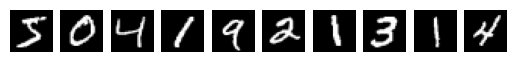

In [3]:
# a)
fig, ax = plt.subplots(1, 10)
for i in range(10):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

In [4]:
# b)
X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255

In [5]:
# c)
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ],
    name='mnist_cnn'
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "mnist_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.callbacks import EarlyStopping

stopper = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode='min')

In [7]:
model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[stopper])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8544 - loss: 0.4731 - val_accuracy: 0.9740 - val_loss: 0.0837
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9800 - loss: 0.0625 - val_accuracy: 0.9860 - val_loss: 0.0474
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9880 - val_loss: 0.0418
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9903 - loss: 0.0301 - val_accuracy: 0.9872 - val_loss: 0.0386
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9919 - loss: 0.0257 - val_accuracy: 0.9878 - val_loss: 0.0465
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9884 - val_loss: 0.0409
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9892 - val_loss: 0.0410


<Axes: >

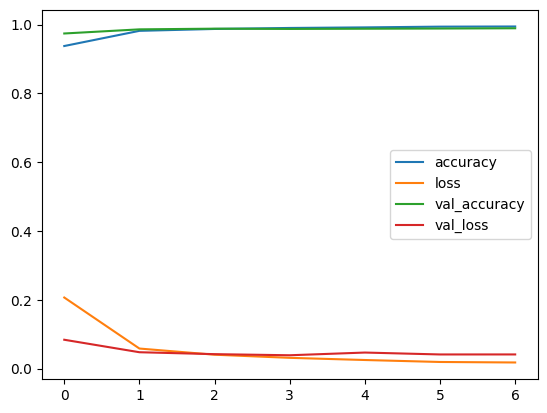

In [8]:
import pandas as pd

pd.DataFrame(model.history.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



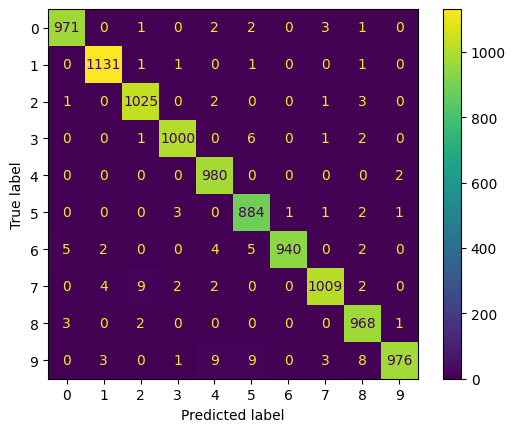

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
ConfusionMatrixDisplay(cm).plot()

In [14]:
# d)
from sklearn.neighbors import KNeighborsClassifier

In [15]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.reshape(-1, 28 * 28), Y_train)
    Y_pred = knn.predict(X_test.reshape(-1, 28 * 28))
    print(f'k={k} -> {np.mean(Y_pred == Y_test)}')

c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


k=1 -> 0.9691
k=2 -> 0.9627
k=3 -> 0.9705
k=4 -> 0.9682
k=5 -> 0.9688
k=6 -> 0.9677
k=7 -> 0.9694
k=8 -> 0.967
k=9 -> 0.9659
k=10 -> 0.9665


## 2. Pokémon images dataset (**/***)


&nbsp; a) Download both images and csv from https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types

&nbsp; b) Explore the dataset. How will you create labels for your training data?

&nbsp; c) Create a train/val/test split. Decide what you are aiming for, ie engineer your features. Do you want to predict the pokemon type (water/fire/etc) from the image (difficulty: ** ), the evolutions (***) or something else? Do you need to augment your data (ie flipping the images etc)?

&nbsp; d) Train and optimize your network for the chosen features. 

<details>

<summary>Hint</summary>

</details>

<details>

<summary>Answer</summary>
<pre>
</pre>
</details>

---

In [1]:
# Nästa fil...